In [2]:
from src.core.dryvrmain import verify
%matplotlib notebook


In [3]:
from scipy.integrate import odeint
import numpy as np 
import time

def thermo_dynamic(y,t,rate):
    dydt = rate*y
    return dydt

def TC_Simulate(Mode,initialCondition,time_bound):
    time_step = 0.05;
    time.sleep(0.1)
    time_bound = float(time_bound)
    initial = [float(tmp)  for tmp in initialCondition]
    number_points = int(np.ceil(time_bound/time_step))
    t = [i*time_step for i in range(0,number_points)]
    if t[-1] != time_step:
        t.append(time_bound)

    y_initial = initial[0]

    if Mode == 'On':
        rate = 0.1
    elif Mode == 'Off':
        rate = -0.1
    else:
        print('Wrong Mode name!')
    sol = odeint(thermo_dynamic,y_initial,t,args=(rate,),hmax = time_step)

    # Construct the final output
    trace = []
    for j in range(len(t)):
        #print t[j], current_psi
        tmp = []
        tmp.append(t[j])
        tmp.append(sol[j,0])
        trace.append(tmp)
    return trace

In [4]:
args = {
    "vertex" : ["On","Off","On"],
    "edge":[[0,1],[1,2]],
    "variables":["temp"],
    "guards":["And(t>1.0,t<=1.1)","And(t>1.0,t<=1.1)"],
    "initialSet":[[75.0],[76.0]],
    "unsafeSet":"@On:temp>91@Off:temp>91",
    "timeHorizon":3.5,
}

<IPython.core.display.Javascript object>


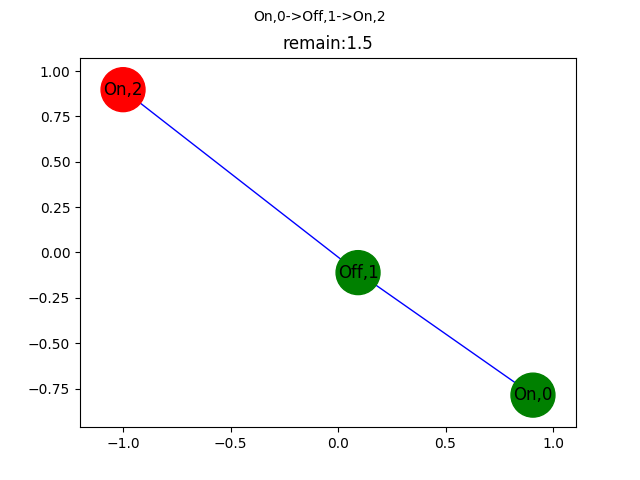

transit time 1.0 remain time 2.5
transit time 1.0 remain time 1.5
transit time 1.5 remain time 0.0
Verification Begin
Mode: 0
stack size: 1
remainTime: 3.5

Lower Bound: [75.0]
Upper Bound: [76.0]
Delta: [0.5]

current mode label: On
Off 1.0 [[82.8845668701073], [85.26238228702563]] And(t>1.0,t<=1.1)
Mode 0 check bloated tube safe
Child exist in cur mode inital 1 is curModeStack Now
Mode: 1
stack size: 1
remainTime: 2.5

Lower Bound: [82.8845668701073]
Upper Bound: [85.26238228702563]
Delta: [1.188907708459162]

current mode label: Off
On 1.0 [[73.88049580103393], [77.14415879719185]] And(t>1.0,t<=1.1)
Mode 1 check bloated tube safe
Child exist in cur mode inital 2 is curModeStack Now
Mode: 2
stack size: 1
remainTime: 1.5

Lower Bound: [73.88049580103393]
Upper Bound: [77.14415879719185]
Delta: [1.6318314980789594]

current mode label: On
Mode 2 check bloated tube safe
No child exist in current initial, pop
back flag safe from 2 to 1
No child in prev mode initial, pop, 1 is curModeStac

<src.core.reachtube.ReachTube instance at 0x112a98a28>

In [5]:
verify(args, TC_Simulate)